<a href="https://colab.research.google.com/github/jackarl/programacion_analitica/blob/main/M%C3%A9trica_del_Sentimiento_Acumulado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

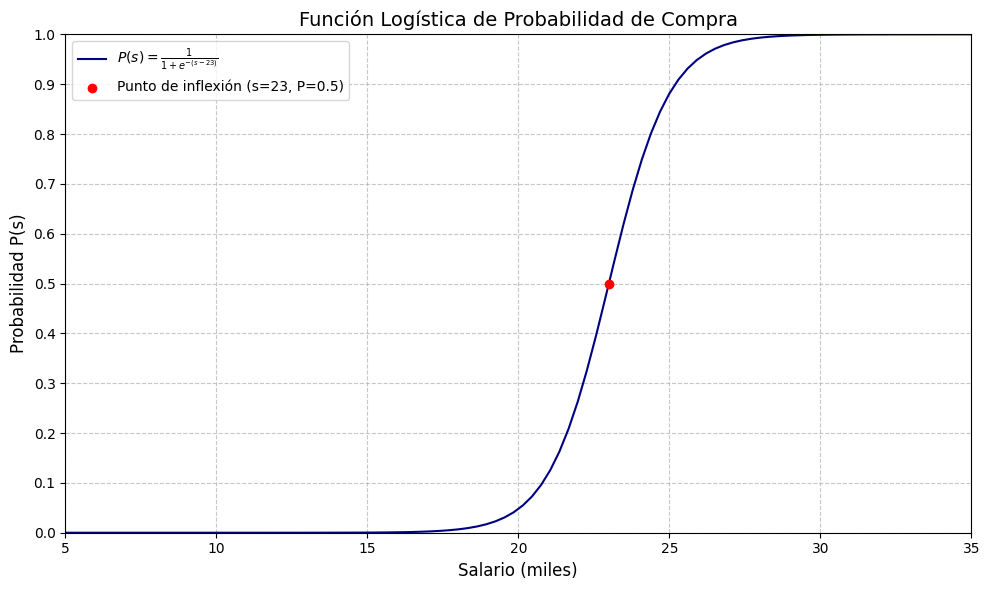

In [ ]:
# Definir la función logística
def P(s, s0=23):
    return 1 / (1 + np.exp(-(s - s0)))

# Rango de valores de salario (s)
s = np.linspace(5, 35, 100)  # Desde 5 hasta 35 con 100 puntos
s0 = 23  # Punto de inflexión

# Calcular valores de P(s)
p_values = P(s, s0)

# Configurar el gráfico
plt.figure(figsize=(10, 6))
plt.plot(s, p_values, label=f'$P(s) = \\frac{{1}}{{1 + e^{{-(s - {s0})}}}}$', color='navy')

# Destacar el punto de inflexión (s0, 0.5)
plt.scatter(s0, 0.5, color='red', zorder=5, label=f'Punto de inflexión (s={s0}, P=0.5)')

# Personalizar el gráfico
plt.title('Función Logística de Probabilidad de Compra', fontsize=14)
plt.xlabel('Salario (miles)', fontsize=12)
plt.ylabel('Probabilidad P(s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(np.arange(5, 36, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim(5, 35)
plt.ylim(0, 1)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Datos originales (salario vs probabilidad)
salarios = np.arange(6, 31)  # Desde 6 hasta 30
probabilidades = np.array([
    0.05999995860062452, 0.05999988746483794, 0.03999969409777308,
    8.315280276641321e-07, 0.05999773967570209, 0.03999385582539779,
    1.670142184809518e-05, 0.019954602131297565, 0.03987660542401377,
    0.0003353501304664781, 0.019088948805599356, 0.017527376843365226,
    0.0066928509242848554, 0.0020137900379084417, 0.012574126822433217,
    0.11920292202211755, 0.2089414213699951, 0.48, 0.7110585786300049,
    0.8407970779778823, 0.9325741268224333, 0.9220137900379084,
    0.9533071490757152, 0.9975273768433653, 0.9790889488055994
])

# Normalizar probabilidades
prob_normalizadas = probabilidades / probabilidades.sum()

# Función logística con s0 = 18
def P(s, s0=18):
    return 1 / (1 + np.exp(-(s - s0)))

# Calcular suma de Riemann
suma_riemann = sum(P(s) * p for s, p in zip(salarios, prob_normalizadas))

print(f"Impacto (s0=18) usando Sumas de Riemann: {suma_riemann:.4f}")

Impacto (s0=18) usando Sumas de Riemann: 0.9508


In [ ]:
# Datos originales (salario vs probabilidad)
salarios = np.arange(6, 31)  # 6 a 30 (25 puntos)
probabilidades = np.array([
    0.05999995860062452, 0.05999988746483794, 0.03999969409777308,
    8.315280276641321e-07, 0.05999773967570209, 0.03999385582539779,
    1.670142184809518e-05, 0.019954602131297565, 0.03987660542401377,
    0.0003353501304664781, 0.019088948805599356, 0.017527376843365226,
    0.0066928509242848554, 0.0020137900379084417, 0.012574126822433217,
    0.11920292202211755, 0.2089414213699951, 0.48, 0.7110585786300049,
    0.8407970779778823, 0.9325741268224333, 0.9220137900379084,
    0.9533071490757152, 0.9975273768433653, 0.9790889488055994
])

# Normalizar probabilidades
prob_normalizadas = probabilidades / probabilidades.sum()

# Función logística con s0 = 18
def P(s, s0=18):
    return 1 / (1 + np.exp(-(s - s0)))

# Calcular método de los trapecios
impacto = 0.0
for i in range(len(salarios)-1):
    s_actual = salarios[i]
    s_siguiente = salarios[i+1]

    # Calcular altura promedio en el intervalo
    altura_promedio = (P(s_actual)*prob_normalizadas[i] + P(s_siguiente)*prob_normalizadas[i+1])/2

    # Ancho del intervalo (siempre 1 en estos datos)
    ancho = s_siguiente - s_actual

    impacto += altura_promedio * ancho

print(f"Impacto (s0=18) usando Trapecios: {impacto:.4f}")

Impacto (s0=18) usando Trapecios: 0.8858


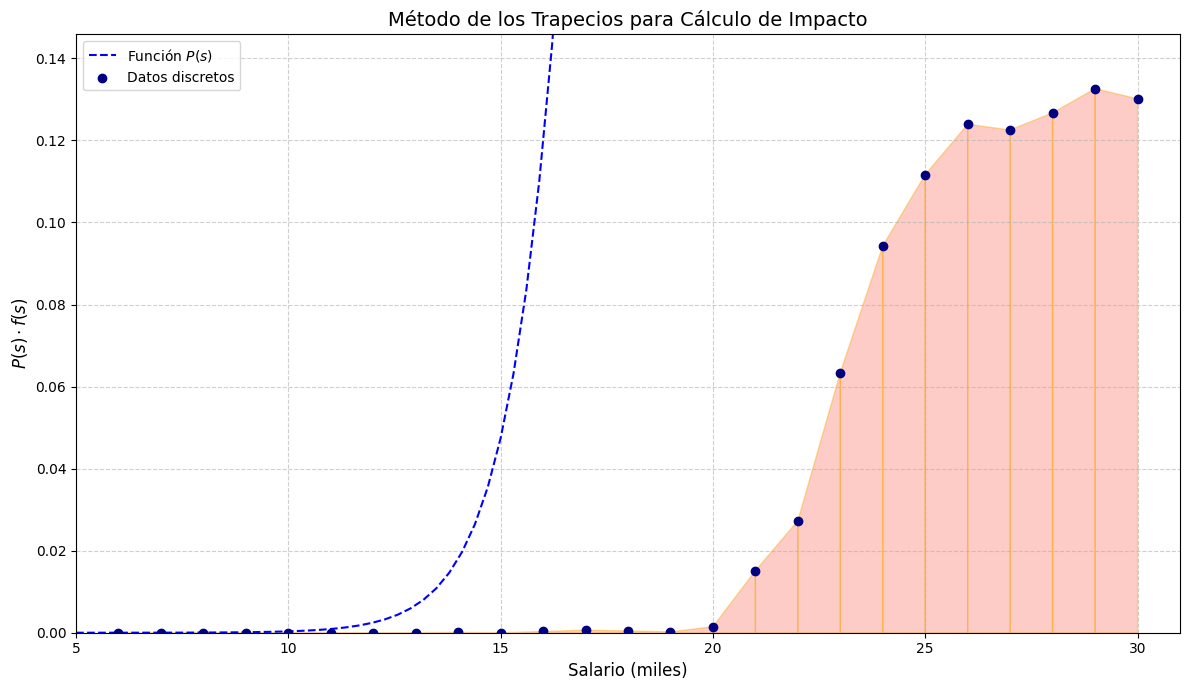

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Datos y configuración inicial
salarios = np.arange(6, 31)
probabilidades = np.array([...])  # Usar el mismo array de probabilidades anterior
#prob_normalizadas = probabilidades / probabilidades.sum()
s0 = 18

# Función logística
def P(s):
    return 1 / (1 + np.exp(-(s - s0)))

# Valores para el plot
y_values = P(salarios) * prob_normalizadas
x_curve = np.linspace(5, 35, 100)
y_curve = P(x_curve)

# Configurar el gráfico
plt.figure(figsize=(12, 7))

# Plot de la función teórica
plt.plot(x_curve, y_curve, 'b--', label='Función $P(s)$', lw=1.5)

# Plot de los trapecios
for i in range(len(salarios)-1):
    vertices = [
        (salarios[i], 0),
        (salarios[i], y_values[i]),
        (salarios[i+1], y_values[i+1]),
        (salarios[i+1], 0)
    ]
    trapezoid = Polygon(vertices, alpha=0.4, edgecolor='orange', facecolor='salmon')
    plt.gca().add_patch(trapezoid)

# Plot de los puntos discretos
plt.scatter(salarios, y_values, color='navy', zorder=3, label='Datos discretos')

# Configuración estética
plt.title('Método de los Trapecios para Cálculo de Impacto', fontsize=14)
plt.xlabel('Salario (miles)', fontsize=12)
plt.ylabel('$P(s) \cdot f(s)$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xlim(5, 31)
plt.ylim(0, max(y_values)*1.1)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
def integral_P(a, b, s0):
    term1 = np.log(1 + np.exp(b - s0))
    term2 = np.log(1 + np.exp(a - s0))
    return term1 - term2

# Ejemplo con s0=18, intervalo [6, 30]
resultado = integral_P(6, 30, 18)
print(f"Integral definida (s0=18) entre 6 y 30: {resultado:.4f}")

Integral definida (s0=18) entre 6 y 30: 12.0000


In [ ]:
integral_P(6, 30, 23)  # Resultado ≈7.0001

np.float64(7.000911425054397)

In [ ]:
def taylor_integral(a, b, s0=18):
    term1 = 0.5*(b - a)
    term2 = 0.25/2 * ((b-s0)**2 - (a-s0)**2)
    term3 = -0.02083/4 * ((b-s0)**4 - (a-s0)**4)
    return term1 + term2 + term3

resultado = taylor_integral(6, 30)
print(f"Integral por Taylor (s0=18): {resultado:.4f}")

Integral por Taylor (s0=18): 12.0000
